# Wrangle Data with pandas package

Create a dataset, add new columns, select columns, filter rows group and aggregate.

 A pandas Dataframe is a 2D object (table).
 A pandas Series is a 1D labelled object.
 pandas rows have unique labels (a strange concept to SQL people).


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # pandas uses matplotlib for plotting


In [2]:
#  Let's have a quick look at a series
p = pd.Series(np.random.randn(4), name = 'price')
p * 100
np.abs(p)


0    1.352669
1    1.482584
2    0.285662
3    0.164980
Name: price, dtype: float64

In [3]:
p.index = ["HSBC", "BP", "TSCO", "RDSA"] # Like a dict
p.describe()
p['BP'] # get a value in the Series
p['BP'] = 5.0 # set a value in the Series
'TSCO' in p # is this value a member of the Series

True

In [8]:
#  We can build a pandas dataframe from a dict
fb_dict = {
        'id' : ['MCY', 'LIV', 'TOT', 'CHE', 'ARL'],
        'city' :	['Manchester',	'Liverpool', 'London', 'London', 'London'],
        'team' :	['Manchester City',	'Liverpool', 'Tottenham Hotspur', 'Chelsea', 'Arsenal'],
        'won' :	[5, 6, 6, 5, 5],
        'drawn' : [4, 1, 0, 2,0],
        'lost' : [0, 0, 2, 0, 2],
        'form' : ['DWWWW', 'WWWWD', 'LLWWW', 'WWWDD', 'WWWWW']
        }
#  Create a pandas dataframe
# The dict's keys become the column names and the dict's values become the column values
fb_df = pd.DataFrame(fb_dict)

# set the index to the unique values of the 'id' column - more useful than 0,1,2...
fb = fb_df.set_index('id')
fb.head(2)


,city,team,won,drawn,lost,form
id,,,,,,
MCY,Manchester,Manchester City,5,4,0,DWWWW
LIV,Liverpool,Liverpool,6,1,0,WWWWD


In [ ]:
#  Examine a dataframe

fb  # Note the index added by pandas
fb.index
fb.head(2)
fb.tail(2)
fb.describe() # summarise the numercio columns
fb.shape
fb.values # a numpy array
fb.city # vaues of a column.  Note the  dot syntax
fb.city.unique()
fb[['city']]
fb.columns #  Return a list of the columns


In [11]:
# Create new columns
# Teams get 3 point for a win, 1 for a draw, none for a loss
fb['points'] = fb['won'] * 3 + fb['drawn']
fb.head(2)


,city,team,won,drawn,lost,form,points
id,,,,,,,
MCY,Manchester,Manchester City,5,4,0,DWWWW,19
LIV,Liverpool,Liverpool,6,1,0,WWWWD,19


### Exercise
Create a new column, played, to hold the number of games played by each team.


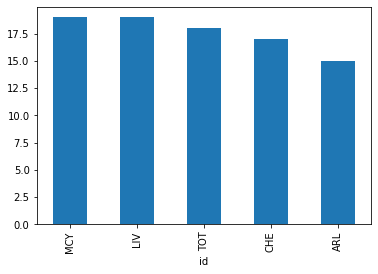

In [12]:
# Show a column chart of the scores of each team 
fb['points'].plot(kind = 'bar')
plt.show()

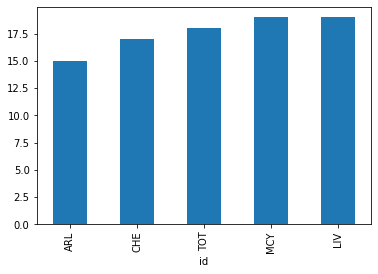

In [13]:
# Order the rows in the dataframe by the points scored (low to high)
fb_sorted = fb.sort_values(by = ['points', 'won'], ascending=True)
# Show the sorted dataframe in a column chart
fb_sorted['points'].plot(kind = 'bar')
plt.show()

In [15]:
# Sort fb by index
fb = fb.sort_values(by = 'id', ascending=True)
fb

,city,team,won,drawn,lost,form,points
id,,,,,,,
ARL,London,Arsenal,5,0,2,WWWWW,15
CHE,London,Chelsea,5,2,0,WWWDD,17
LIV,Liverpool,Liverpool,6,1,0,WWWWD,19
MCY,Manchester,Manchester City,5,4,0,DWWWW,19
TOT,London,Tottenham Hotspur,6,0,2,LLWWW,18


In [17]:
# Add a new column team_caps
fb['team_caps'] = fb['team'].apply(str.upper)
fb

,city,team,won,drawn,lost,form,points,team_caps
id,,,,,,,,
ARL,London,Arsenal,5,0,2,WWWWW,15,ARSENAL
CHE,London,Chelsea,5,2,0,WWWDD,17,CHELSEA
LIV,Liverpool,Liverpool,6,1,0,WWWWD,19,LIVERPOOL
MCY,Manchester,Manchester City,5,4,0,DWWWW,19,MANCHESTER CITY
TOT,London,Tottenham Hotspur,6,0,2,LLWWW,18,TOTTENHAM HOTSPUR


In [18]:
# The next two statements have the same effect - which do you prefer?
fb['team_short'] = fb['team'].str[:5]
# uses a list comprehension
fb['team_short2'] = [x[0:5] for x in fb['team'] if len(x) > 5]
fb


,city,team,won,drawn,lost,form,points,team_caps,team_short,team_short2
id,,,,,,,,,,
ARL,London,Arsenal,5,0,2,WWWWW,15,ARSENAL,Arsen,Arsen
CHE,London,Chelsea,5,2,0,WWWDD,17,CHELSEA,Chels,Chels
LIV,Liverpool,Liverpool,6,1,0,WWWWD,19,LIVERPOOL,Liver,Liver
MCY,Manchester,Manchester City,5,4,0,DWWWW,19,MANCHESTER CITY,Manch,Manch
TOT,London,Tottenham Hotspur,6,0,2,LLWWW,18,TOTTENHAM HOTSPUR,Totte,Totte


In [20]:
# Let's group by city to get the total scores per city
fb_by_city = fb.groupby(['city'], as_index = False)
fb_by_city.sum()
fb_by_city


In [21]:
fb.loc[:, ['city']] # all rows, one column
fb.loc['LIV', :] # one row, all columns
fb.loc[['LIV'], :] # one row, all columns
fb.loc[['LIV', 'MCY'], :] #   two rows, all columns
fb.loc[['LIV', 'MCY'], ['team', 'won']] # two rows, two columns
fb.loc[:, ['team', 'won']] # two rows, two columns

,team,won
id,,
ARL,Arsenal,5
CHE,Chelsea,5
LIV,Liverpool,6
MCY,Manchester City,5
TOT,Tottenham Hotspur,6


In [22]:
fb.won 
fb.won > 5
fb.loc[fb.won > 5, :]
fb.loc[fb.city == 'London', :]
fb.city == 'London'
(fb.city == 'London') & (fb.won > 5)
fb.loc[(fb.city == 'London') & (fb.won > 5), :]

,city,team,won,drawn,lost,form,points,team_caps,team_short,team_short2
id,,,,,,,,,,
TOT,London,Tottenham Hotspur,6,0,2,LLWWW,18,TOTTENHAM HOTSPUR,Totte,Totte
